<a id="1"></a> <br>
# 1. COMPRENSIÓN DEL NEGOCIO
Se definen los objetivos y el problema que se quiere resolver con los datos.
📌 Ejemplo: Una tienda online quiere predecir qué clientes harán compras recurrentes.
📌 Tareas clave:
✔️ Identificar los objetivos de negocio.
✔️ Establecer KPIs para medir el éxito del modelo.

1. CONOCIMIENTO DEL NEGOCIO

El presente proyecto se desarrolla a partir de un conjunto de datos relacionados con operaciones aéreas en Estados Unidos, específicamente vuelos comerciales. El dataset original contiene varios millones de registros; sin embargo, debido a limitaciones de memoria y para trabajar con datos representativos, se realizó un muestreo estratificado por año, seleccionando 200,000 vuelos por cada periodo, con el fin de mantener la distribución temporal y operacional del fenómeno.

El resultado final del muestreo contiene aproximadamente 2750000 registros (la misma cantidad por cada año) y las siguientes variables seleccionadas por su relevancia analítica y su valor para los procesos posteriores de limpieza, preparación, modelado y visualización.

## Descripción del Dataset

Las columnas elegidas corresponden a las categorías sugeridas por el catedrático:

* Time Period
* Airline
* Origin and Destination
* Departure & Arrival Performance
* Cancellations & Diversions
* Flight Summaries
* Cause of Delay
* A partir de estas categorías, las variables incluidas en el dataset final son:

### Variables del Tiempo
* YEAR: Año del vuelo.
* MONTH: Mes del vuelo.
* DAY_OF_MONTH: Día del mes.
* FECHA_DEP: Fecha y hora exactas de salida del vuelo, calculadas a partir de YEAR, MONTH, DAY_OF_MONTH y DEP_TIME.
* semana: Semana del año en la que ocurrió el vuelo.
* trimestre: Trimestre del año.
* es_festivo: Indica si el vuelo ocurrió en un día festivo federal en EE.UU.

### Aerolínea
* OP_UNIQUE_CARRIER: Código del transportista aéreo (aerolínea operadora).

### Origen y Destino
* ORIGIN: Código del aeropuerto de origen.
* DEST: Código del aeropuerto de destino.
* ORIGIN_TZ / DEST_TZ: Zona horaria asignada mediante la integración con datos FAA.

### Desempeño de Salida y Llegada
* DEP_TIME: Hora real de despegue.
* ARR_TIME: Hora real de llegada.
* CRS_DEP_TIME / CRS_ARR_TIME: Hora programada de salida/llegada (si se usa).
* DEP_DELAY: Minutos de retraso en salida.
* ARR_DELAY: Minutos de retraso en llegada.

### Cancelaciones y Desviaciones

* CANCELLED: Indica si el vuelo fue cancelado.
* DIVERTED: Indica si el vuelo fue desviado.

### Resumen del Vuelo / Columnas Derivadas

* retraso_total: Suma de retraso en salida y llegada.
* categoria_retraso: Clasificación del retraso en cuatro categorías
  * Sin retraso
  * Retraso leve
  * Retraso medio
  * Retraso grave


## Inspiración del Análisis

Este proyecto responde preguntas fundamentales para comprender el comportamiento del sistema aeronáutico y sus factores de impacto:

* ¿En qué meses y días de la semana se presentan más retrasos?
* ¿Qué aerolíneas exhiben mejor o peor desempeño puntual?
* ¿Existen aeropuertos particularmente problemáticos?
* ¿Cómo afecta la estacionalidad (semana, trimestre, feriados) al flujo de vuelos?
* ¿Se pueden identificar patrones que expliquen los retrasos prolongados?
* ¿Los vuelos en días festivos tienden a presentar mayor retraso?

Este análisis busca generar conocimiento accionable para:
* optimizar operaciones aeroportuarias,
* mejorar la planificación de vuelos,
* comprender la demanda temporal,
* analizar congestión del sistema,
* evaluar políticas de aerolíneas y aeropuertos.

In [ ]:
## Importando las líbreras
## Si hiciera falta la instalación de alguna librería se realiza con !pip install <libreria>
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import datetime
from scipy.stats import chi2_contingency# This Python 3 environment comes with many helpful analytics libraries installed


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
'''
import zipfile
import pyarrow as pa
import pyarrow.parquet as pq
import os
import pandas as pd # Ensure pandas is imported if not already, as it's used

zip_path = "drive/MyDrive/Colab Notebooks/Proyecto Final/2. Data understanding/Dataset/Vuelos.zip"
csv_name = "Vuelos.csv"
salida = "drive/MyDrive/Colab Notebooks/Proyecto Final/2. Data understanding/Dataset/Vuelos_raw.parquet"

chunksize = 200_000

# Eliminar el archivo de salida si ya existe para asegurar un esquema consistente
if os.path.exists(salida):
    os.remove(salida)
    print(f"Archivo existente '{salida}' eliminado.")

writer = None  # se inicializa después del primer chunk

with zipfile.ZipFile(zip_path) as z:
    with z.open(csv_name) as f:
        for i, chunk in enumerate(pd.read_csv(f, chunksize=chunksize, low_memory=False)):

            # Convertir CRS_ARR_TIME a float para asegurar consistencia de tipo
            # Esto maneja casos donde algunos chunks pueden tener NaNs en esta columna
            # forzar la inferencia a double (float64 en pandas)
            if 'CRS_ARR_TIME' in chunk.columns:
                chunk['CRS_ARR_TIME'] = chunk['CRS_ARR_TIME'].astype(float)

            # Also ensure CRS_DEP_TIME is float for consistency, as per error
            if 'CRS_DEP_TIME' in chunk.columns:
                chunk['CRS_DEP_TIME'] = chunk['CRS_DEP_TIME'].astype(float)

            # Convertir pandas → Arrow Table
            table = pa.Table.from_pandas(chunk, preserve_index=False)

            # Crear writer en primer chunk
            if writer is None:
                writer = pq.ParquetWriter(salida, table.schema)

            # Escribir chunk
            writer.write_table(table)

            print(f"Procesado chunk {i}")

# cerrar writer al final
if writer:
    writer.close()
    print("Procesamiento completado.")
'''

Archivo existente 'drive/MyDrive/Colab Notebooks/Proyecto Final/2. Data understanding/Dataset/Vuelos_raw.parquet' eliminado.
Procesado chunk 0
Procesado chunk 1
Procesado chunk 2
Procesado chunk 3
Procesado chunk 4
Procesado chunk 5
Procesado chunk 6
Procesado chunk 7
Procesado chunk 8
Procesado chunk 9
Procesado chunk 10
Procesado chunk 11
Procesado chunk 12
Procesado chunk 13
Procesado chunk 14
Procesado chunk 15
Procesado chunk 16
Procesado chunk 17
Procesado chunk 18
Procesado chunk 19
Procesado chunk 20
Procesado chunk 21
Procesado chunk 22
Procesado chunk 23
Procesado chunk 24
Procesado chunk 25
Procesado chunk 26
Procesado chunk 27
Procesado chunk 28
Procesado chunk 29
Procesado chunk 30
Procesado chunk 31
Procesado chunk 32
Procesado chunk 33
Procesado chunk 34
Procesado chunk 35
Procesado chunk 36
Procesado chunk 37
Procesado chunk 38
Procesado chunk 39
Procesado chunk 40
Procesado chunk 41
Procesado chunk 42
Procesado chunk 43
Procesado chunk 44
Procesado chunk 45
Procesado c

In [ ]:
import polars as pl

df = pl.scan_parquet("drive/MyDrive/Colab Notebooks/Proyecto Final/2. Data understanding/Dataset/Vuelos_raw.parquet")
df.schema

/tmp/ipython-input-3718315188.py:4: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  df.schema


Schema([('YEAR', Int64),
        ('MONTH', Int64),
        ('DAY_OF_MONTH', Int64),
        ('DAY_OF_WEEK', Int64),
        ('OP_UNIQUE_CARRIER', String),
        ('ORIGIN_AIRPORT_ID', Int64),
        ('ORIGIN_CITY_MARKET_ID', Int64),
        ('ORIGIN', String),
        ('ORIGIN_CITY_NAME', String),
        ('ORIGIN_STATE_ABR', String),
        ('ORIGIN_STATE_NM', String),
        ('DEST_AIRPORT_ID', Int64),
        ('DEST_CITY_MARKET_ID', Int64),
        ('DEST', String),
        ('DEST_CITY_NAME', String),
        ('DEST_STATE_ABR', String),
        ('DEST_STATE_NM', String),
        ('CRS_DEP_TIME', Float64),
        ('DEP_TIME', Float64),
        ('DEP_DELAY', Float64),
        ('CRS_ARR_TIME', Float64),
        ('ARR_TIME', Float64),
        ('ARR_DELAY', Float64),
        ('CANCELLED', Float64),
        ('CANCELLATION_CODE', String),
        ('DIVERTED', Float64),
        ('CARRIER_DELAY', Float64),
        ('WEATHER_DELAY', Float64),
        ('NAS_DELAY', Float64),
        ('SEC

In [ ]:
#Conteo
df.select(pl.count()).collect()

/tmp/ipython-input-3463169677.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  df.select(pl.count()).collect()


count
u32
66029807


In [ ]:
for c in df.columns:
    nulos = df.select(pl.col(c).null_count()).collect()[0,0]
    print(f"{c}: {nulos} nulos")

/tmp/ipython-input-4020288614.py:1: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  for c in df.columns:


YEAR: 0 nulos
MONTH: 0 nulos
DAY_OF_MONTH: 0 nulos
DAY_OF_WEEK: 0 nulos
OP_UNIQUE_CARRIER: 0 nulos
ORIGIN_AIRPORT_ID: 0 nulos
ORIGIN_CITY_MARKET_ID: 0 nulos
ORIGIN: 0 nulos
ORIGIN_CITY_NAME: 0 nulos
ORIGIN_STATE_ABR: 0 nulos
ORIGIN_STATE_NM: 0 nulos
DEST_AIRPORT_ID: 0 nulos
DEST_CITY_MARKET_ID: 0 nulos
DEST: 0 nulos
DEST_CITY_NAME: 0 nulos
DEST_STATE_ABR: 0 nulos
DEST_STATE_NM: 0 nulos
CRS_DEP_TIME: 1 nulos
DEP_TIME: 1245053 nulos
DEP_DELAY: 1246073 nulos
CRS_ARR_TIME: 2 nulos
ARR_TIME: 1304950 nulos
ARR_DELAY: 1435753 nulos
CANCELLED: 0 nulos
CANCELLATION_CODE: 64748105 nulos
DIVERTED: 0 nulos
CARRIER_DELAY: 54311709 nulos
WEATHER_DELAY: 54311709 nulos
NAS_DELAY: 54311709 nulos
SECURITY_DELAY: 54311709 nulos
LATE_AIRCRAFT_DELAY: 54311709 nulos


In [ ]:
'''
import sqlite3
import pandas as pd

# Conexión a SQLite
conn = sqlite3.connect("vuelos.db")
cur = conn.cursor()

# Crear tabla con columnas necesarias
cur.execute("""
CREATE TABLE IF NOT EXISTS vuelos (
    YEAR INTEGER,
    MONTH INTEGER,
    DAY_OF_MONTH INTEGER,
    DAY_OF_WEEK INTEGER,
    OP_UNIQUE_CARRIER TEXT,
    ORIGIN TEXT,
    DEST TEXT,
    DEP_TIME INTEGER,
    ARR_TIME INTEGER,
    DEP_DELAY REAL,
    ARR_DELAY REAL,
    CANCELLED INTEGER,
    DIVERTED INTEGER
)
""")
conn.commit()

# Cargar CSV en chunks para no colapsar RAM
chunksize = 100000
csv_path = "drive/MyDrive/Colab Notebooks/Proyecto Final/2. Data understanding/Dataset/Vuelos.zip"

for chunk in pd.read_csv(csv_path, usecols=[
        "YEAR","MONTH","DAY_OF_MONTH","DAY_OF_WEEK",
        "OP_UNIQUE_CARRIER","ORIGIN","DEST",
        "DEP_TIME","ARR_TIME","DEP_DELAY","ARR_DELAY",
        "CANCELLED","DIVERTED"
    ], chunksize=chunksize):
    chunk.to_sql("vuelos", conn, if_exists="append", index=False)
'''

In [ ]:

import sqlite3
conn = sqlite3.connect("vuelos.db")

# Lista de años
años = [2011,2012,2013,2014,2015, 2016, 2017, 2018,2019,2020,2021]

df_muestras = []


for y in años:
    query = f"""
    SELECT *
    FROM vuelos
    WHERE CANCELLED = 0 AND YEAR = {y}
    ORDER BY RANDOM()
    LIMIT 250000
    """
    df = pd.read_sql(query, conn)
    df_muestras.append(df)

# Unir todas las muestras
df_sample = pd.concat(df_muestras, ignore_index=True)


In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750000 entries, 0 to 2749999
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   YEAR               int64  
 1   MONTH              int64  
 2   DAY_OF_MONTH       int64  
 3   DAY_OF_WEEK        int64  
 4   OP_UNIQUE_CARRIER  object 
 5   ORIGIN             object 
 6   DEST               object 
 7   DEP_TIME           int64  
 8   ARR_TIME           float64
 9   DEP_DELAY          float64
 10  ARR_DELAY          float64
 11  CANCELLED          int64  
 12  DIVERTED           int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 272.8+ MB


In [ ]:
#Se eliminan duplicados
df_sample.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

,0
YEAR,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
OP_UNIQUE_CARRIER,0
ORIGIN,0
DEST,0
DEP_TIME,0
ARR_TIME,64
DEP_DELAY,0


In [ ]:
#Se inputaron los datos vacios por 0
df_sample[['ARR_TIME', 'ARR_DELAY']] = df_sample[['ARR_TIME', 'ARR_DELAY']].fillna(0)


In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750000 entries, 0 to 2749999
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   YEAR               int64  
 1   MONTH              int64  
 2   DAY_OF_MONTH       int64  
 3   DAY_OF_WEEK        int64  
 4   OP_UNIQUE_CARRIER  object 
 5   ORIGIN             object 
 6   DEST               object 
 7   DEP_TIME           int64  
 8   ARR_TIME           float64
 9   DEP_DELAY          float64
 10  ARR_DELAY          float64
 11  CANCELLED          int64  
 12  DIVERTED           int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 272.8+ MB


<a id="2.1"></a> <br>
## 2.1. EXPLORACIÓN DE DATOS (EDA)
La exploración de datos es el proceso de investigar, comprender y visualizar un conjunto de datos para obtener información significativa y revelar patrones, tendencias o anomalías que puedan estar presentes en los datos. Es una etapa fundamental en el análisis de datos que precede a la modelización y la toma de decisiones.

In [ ]:
df_sample.head(n=10)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,ARR_TIME,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED
0,2011,4,5,2,FL,ATL,RDU,848,1009.0,-2.0,-3.0,0,0
1,2011,12,27,2,WN,BWI,ECP,1739,1854.0,14.0,9.0,0,0
2,2011,2,6,7,WN,LIT,PHX,746,936.0,-4.0,-24.0,0,0
3,2011,10,21,5,US,SMF,PHX,1231,1413.0,3.0,-2.0,0,0
4,2011,12,10,6,CO,IAH,PHX,1134,1324.0,-1.0,-6.0,0,0
5,2011,12,11,7,DL,LAS,CVG,1226,1900.0,46.0,41.0,0,0
6,2011,9,20,2,AA,DFW,SAT,1828,1918.0,-7.0,-22.0,0,0
7,2011,9,29,4,CO,SEA,ANC,1313,1545.0,-2.0,-10.0,0,0
8,2011,1,28,5,WN,OAK,SAN,2019,2140.0,4.0,0.0,0,0
9,2011,8,24,3,OO,SFO,LMT,2150,2307.0,-1.0,-7.0,0,0


In [ ]:
df_sample.tail(n=10)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,ARR_TIME,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED
2749990,2021,2,25,4,OO,SLN,ORD,730,924.0,-10.0,-11.0,0,0
2749991,2021,5,5,3,NK,MCO,ATL,1225,1353.0,0.0,3.0,0,0
2749992,2021,6,15,2,DL,PDX,SEA,723,811.0,-2.0,-9.0,0,0
2749993,2021,1,25,1,B6,BDL,RSW,1551,1907.0,-14.0,-12.0,0,0
2749994,2021,3,2,2,WN,BWI,MDW,655,806.0,-5.0,-14.0,0,0
2749995,2021,12,29,3,9E,CSG,ATL,1503,1556.0,93.0,91.0,0,0
2749996,2021,11,18,4,OO,DEN,MAF,956,1239.0,-4.0,-13.0,0,0
2749997,2021,7,1,4,DL,ATL,SNA,2126,2249.0,27.0,21.0,0,0
2749998,2021,9,1,3,WN,SMF,BUR,1539,1645.0,-1.0,-10.0,0,0
2749999,2021,9,12,7,MQ,ORD,MCI,1703,1828.0,8.0,1.0,0,0


In [ ]:
df_sample.shape

(2750000, 13)

In [ ]:
df_sample.describe()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,ARR_TIME,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED
count,2.750000e+06,2.750000e+06,2.750000e+06,2.750000e+06,2.750000e+06,2.750000e+06,2.749983e+06,2.750000e+06,2750000.0,2.750000e+06
mean,2.016000e+03,6.567315e+00,1.569892e+01,3.952320e+00,1.331823e+03,1.476486e+03,8.781755e+00,3.782576e+00,0.0,2.293091e-03
std,3.162278e+00,3.433383e+00,8.767557e+00,1.994791e+00,4.907181e+02,5.197567e+02,4.019193e+01,4.234805e+01,0.0,4.783130e-02
min,2.011000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.200000e+02,-1.120000e+02,0.0,0.000000e+00
25%,2.013000e+03,4.000000e+00,8.000000e+00,2.000000e+00,9.230000e+02,1.101000e+03,-5.000000e+00,-1.400000e+01,0.0,0.000000e+00
50%,2.016000e+03,7.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.511000e+03,-2.000000e+00,-6.000000e+00,0.0,0.000000e+00
75%,2.019000e+03,1.000000e+01,2.300000e+01,6.000000e+00,1.735000e+03,1.912000e+03,6.000000e+00,7.000000e+00,0.0,0.000000e+00
max,2.021000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.400000e+03,2.482000e+03,2.475000e+03,0.0,1.000000e+00


In [ ]:
df_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,2750000.0,2016.000000,3.162278,2011.0,2013.0,2016.0,2019.0,2021.0
MONTH,2750000.0,6.567315,3.433383,1.0,4.0,7.0,10.0,12.0
DAY_OF_MONTH,2750000.0,15.698922,8.767557,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,2750000.0,3.952320,1.994791,1.0,2.0,4.0,6.0,7.0
DEP_TIME,2750000.0,1331.822928,490.718075,1.0,923.0,1325.0,1735.0,2400.0
ARR_TIME,2750000.0,1476.485640,519.756728,0.0,1101.0,1511.0,1912.0,2400.0
DEP_DELAY,2749983.0,8.781755,40.191933,-120.0,-5.0,-2.0,6.0,2482.0
ARR_DELAY,2750000.0,3.782576,42.348049,-112.0,-14.0,-6.0,7.0,2475.0
CANCELLED,2750000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
DIVERTED,2750000.0,0.002293,0.047831,0.0,0.0,0.0,0.0,1.0


### Caracteristicas derivadas

In [ ]:
df_sample['FECHA'] = pd.to_datetime({
    'year': df_sample['YEAR'],
    'month': df_sample['MONTH'],
    'day': df_sample['DAY_OF_MONTH']
})

In [ ]:
def hhmm_to_time(x):
    if pd.isna(x):
        return pd.NaT

    x = int(x)

    # Extraer hora y minutos
    hh = x // 100
    mm = x % 100

    # Corregir casos inválidos
    if hh == 24:
        hh = 0  # 24:00 → 00:00 (día siguiente)
    if hh > 24 or mm > 59:
        return pd.NaT  # valores corruptos

    try:
        return pd.to_datetime(f"{hh:02d}:{mm:02d}", format="%H:%M").time()
    except:
        return pd.NaT


In [ ]:
df_sample['DEP_TIME_LOCAL'] = df_sample['DEP_TIME'].apply(hhmm_to_time)
df_sample['ARR_TIME_LOCAL'] = df_sample['ARR_TIME'].apply(hhmm_to_time)

In [ ]:
# Con la FECHA y la hora de dep y arr se contruyen los datetimes que siguen
df_sample["DEP_DATETIME_LOCAL"] = df_sample.apply(
    lambda r: pd.Timestamp.combine(r["FECHA"], r["DEP_TIME_LOCAL"])
    if pd.notna(r["FECHA"]) and pd.notna(r["DEP_TIME_LOCAL"])
    else pd.NaT,
    axis=1
)

df_sample["ARR_DATETIME_LOCAL"] = df_sample.apply(
    lambda r: pd.Timestamp.combine(r["FECHA"], r["ARR_TIME_LOCAL"])
    if pd.notna(r["FECHA"]) and pd.notna(r["ARR_TIME_LOCAL"])
    else pd.NaT,
    axis=1
)

In [ ]:
mask = df_sample["ARR_DATETIME_LOCAL"] < df_sample["DEP_DATETIME_LOCAL"]
df_sample.loc[mask, "ARR_DATETIME_LOCAL"] += pd.Timedelta(days=1)

In [ ]:
df_sample["DURACION_REAL"] = (df_sample["ARR_DATETIME_LOCAL"] - df_sample["DEP_DATETIME_LOCAL"]).dt.total_seconds() / 60

In [ ]:
tz_map_iata = {
    "HNL": "Pacific/Honolulu",
    "ITO": "Pacific/Honolulu",
    "KOA": "Pacific/Honolulu",
    "OGG": "Pacific/Honolulu",
    "LIH": "Pacific/Honolulu",
    "ANC": "America/Anchorage",
    "FAI": "America/Anchorage",
    "JNU": "America/Anchorage",
    "LAX": "America/Los_Angeles",
    "SFO": "America/Los_Angeles",
    "SAN": "America/Los_Angeles",
    "SEA": "America/Los_Angeles",
    "PDX": "America/Los_Angeles",
    "SJC": "America/Los_Angeles",
    "SMF": "America/Los_Angeles",
    "LAS": "America/Los_Angeles",
    "PHX": "America/Phoenix",
    "TUS": "America/Phoenix",
    "DEN": "America/Denver",
    "SLC": "America/Denver",
    "DFW": "America/Chicago",
    "IAH": "America/Chicago",
    "ORD": "America/Chicago",
    "MSP": "America/Chicago",
    "STL": "America/Chicago",
    "MCI": "America/Chicago",
    "AUS": "America/Chicago",
    "ATL": "America/New_York",
    "MIA": "America/New_York",
    "CLT": "America/New_York",
    "JFK": "America/New_York",
    "EWR": "America/New_York",
    "BOS": "America/New_York",
    "IAD": "America/New_York",
    "DCA": "America/New_York"
}

In [ ]:
df_sample["ORIGIN_TZ"] = df_sample["ORIGIN"].map(tz_map_iata)
df_sample["DEST_TZ"] = df_sample["DEST"].map(tz_map_iata)

In [ ]:
import pytz

def local_to_utc(row, col_dt, col_tz):
    if pd.isnull(row[col_tz]):  # algunos aeropuertos pueden faltar
        return pd.NaT
    tz = pytz.timezone(row[col_tz])
    return tz.localize(row[col_dt]).astimezone(pytz.utc)

df_sample["DEP_UTC"] = df_sample.apply(lambda r: local_to_utc(r, "DEP_DATETIME_LOCAL", "ORIGIN_TZ"), axis=1)
df_sample["ARR_UTC"] = df_sample.apply(lambda r: local_to_utc(r, "ARR_DATETIME_LOCAL", "DEST_TZ"), axis=1)



In [ ]:
df_sample["RETRASO_TOTAL"] = (df_sample["ARR_UTC"] - df_sample["DEP_UTC"]).dt.total_seconds() / 60
#df_sample["RETRASO_PROGRAMADO_MIN"] = (df_sample["CRS_ARR_DATETIME"] - df_sample["CRS_DEP_DATETIME"]).dt.total_seconds() / 60
#df_sample["RETRASO_REAL"] = df_sample["RETRASO_TOTAL_MIN"] - df_sample["RETRASO_PROGRAMADO_MIN"]

In [ ]:
def clasificar_delay(x):
    if x <= 0:
        return "A tiempo"
    elif x <= 15:
        return "Leve"
    elif x <= 60:
        return "Moderado"
    elif x <= 180:
        return "Fuerte"
    else:
        return "Crítico"

df_sample["CATEGORIA_RETRASO"] = df_sample["RETRASO_TOTAL"].apply(clasificar_delay)

In [ ]:
df_sample["SEMANA"] = df_sample["FECHA"].dt.isocalendar().week
df_sample["TRIMESTRE"] = df_sample["FECHA"].dt.quarter
df_sample["DIA_ANIO"] = df_sample["FECHA"].dt.dayofyear
df_sample["NOMBRE_DIA"] = df_sample["FECHA"].dt.day_name()
df_sample["NOMBRE_MES"] = df_sample["FECHA"].dt.month_name()

In [ ]:
import holidays
us_holidays = holidays.US()
df_sample["ES_FERIADO"] = df_sample["FECHA"].isin(us_holidays)
df_sample["NOMBRE_FERIADO"] = df_sample["FECHA"].map(us_holidays)

<a id="2.2"></a> <br>
##  2.2. VISUALIZACIÓN DE DATOS

La visualización de datos con Python es un proceso mediante el cual se representan gráficamente los datos para comprender mejor su estructura, identificar patrones, tendencias y relaciones entre variables. Python ofrece una variedad de bibliotecas poderosas y flexibles para la visualización de datos, siendo las más populares Matplotlib, Seaborn y Plotly.


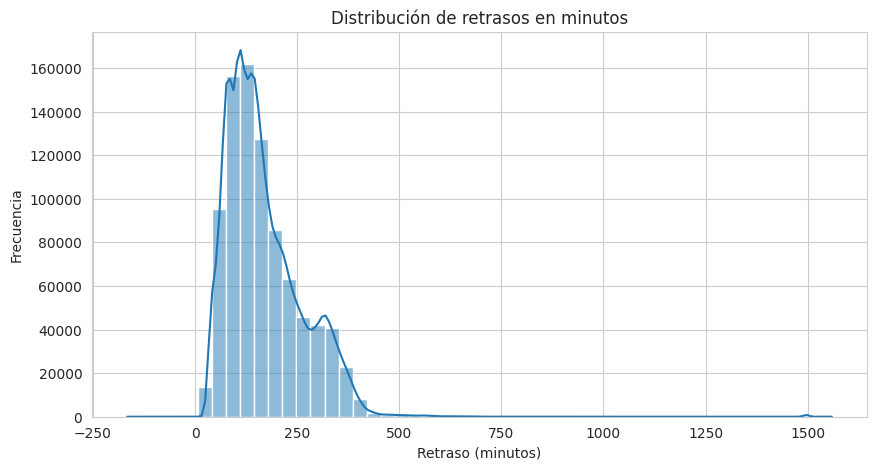

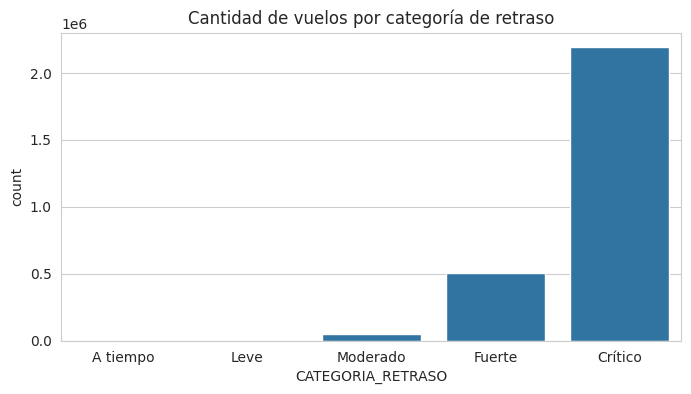

In [ ]:

sns.set_style("whitegrid")

# Distribución de retrasos
plt.figure(figsize=(10,5))
sns.histplot(df_sample["RETRASO_TOTAL"], bins=50, kde=True)
plt.title("Distribución de retrasos en minutos")
plt.xlabel("Retraso (minutos)")
plt.ylabel("Frecuencia")
plt.show()

# Categorías de retraso
plt.figure(figsize=(8,4))
sns.countplot(x="CATEGORIA_RETRASO", data=df_sample, order=["A tiempo","Leve","Moderado","Fuerte","Crítico"])
plt.title("Cantidad de vuelos por categoría de retraso")
plt.show()

**Gráfica #1.** La distribución de retrasos en minutos demuestra que el pico más alto de atraso se encuentra alrededor de 100 a 150 minutos aproximadamente. Además, por la expansión de la cola se visualiza que existen retrasos muy largos.

**Gráfica #2.** La barra correspondiente a Crítico es notablemente más alta que todas las demás, superando los 2.2 millones de vuelos. Esto indica que una cantidad muy significativa de vuelos presenta retrasos severos, algo que podría deberse a la categorización/reglas tomadas.

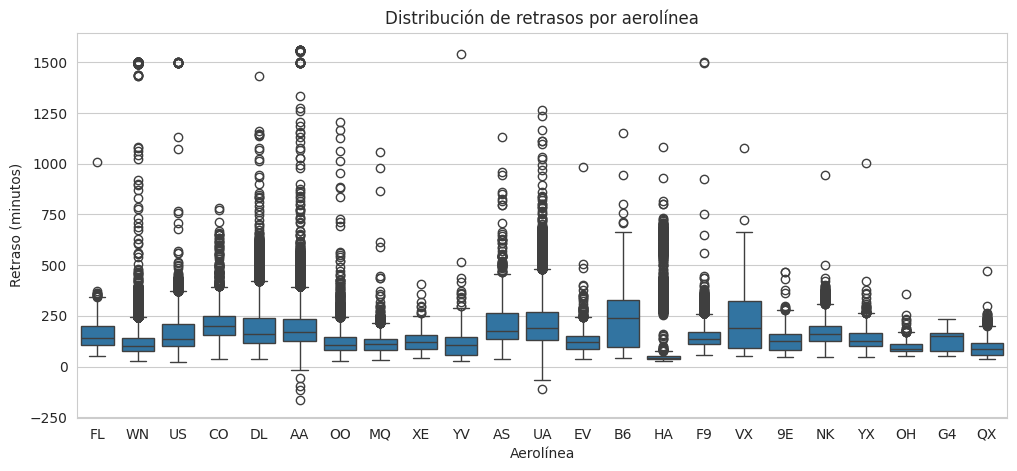

OP_UNIQUE_CARRIER
B6    223.759734
VX    208.460700
CO    208.195833
UA    203.636853
AS    200.669939
AA    184.975491
DL    182.204124
NK    164.496108
US    162.996148
FL    160.046230
F9    148.334120
YX    134.083875
G4    128.716667
9E    128.009977
XE    123.808281
EV    120.744432
WN    120.317161
OO    116.558487
MQ    111.548832
YV    106.306254
HA     99.426542
QX     97.358333
OH     96.442759
Name: RETRASO_TOTAL, dtype: float64


In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x="OP_UNIQUE_CARRIER", y="RETRASO_TOTAL", data=df_sample)
plt.title("Distribución de retrasos por aerolínea")
plt.ylabel("Retraso (minutos)")
plt.xlabel("Aerolínea")
plt.show()

# Promedio de retraso por aerolínea
avg_delay_airline = df_sample.groupby("OP_UNIQUE_CARRIER")["RETRASO_TOTAL"].mean().sort_values(ascending=False)
print(avg_delay_airline)

**Gráfica #3.** Todas las aerolíneas presentan outliers significativos, se observa una cantidad abundante de puntos por encima del bigote superior en la mayoría, algunas de hasta 1500 minutos.

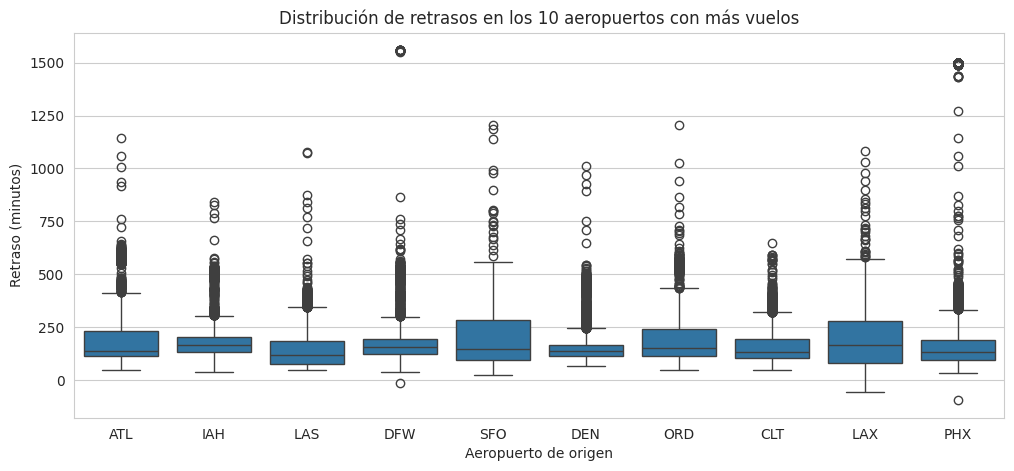

In [ ]:
plt.figure(figsize=(12,5))
top_airports = df_sample["ORIGIN"].value_counts().nlargest(10).index
sns.boxplot(x="ORIGIN", y="RETRASO_TOTAL", data=df_sample[df_sample["ORIGIN"].isin(top_airports)])
plt.title("Distribución de retrasos en los 10 aeropuertos con más vuelos")
plt.ylabel("Retraso (minutos)")
plt.xlabel("Aeropuerto de origen")
plt.show()

**Gráfica #4.** Algunos aeropuertos como DFW y LAX muestran outliers severos, lo cual sugiere problemas operativos puntuales y reprogramaciones largas

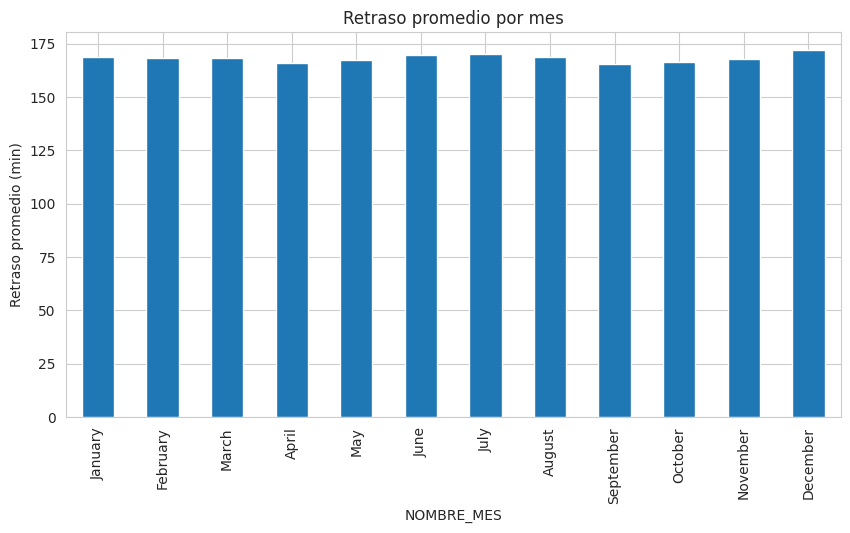

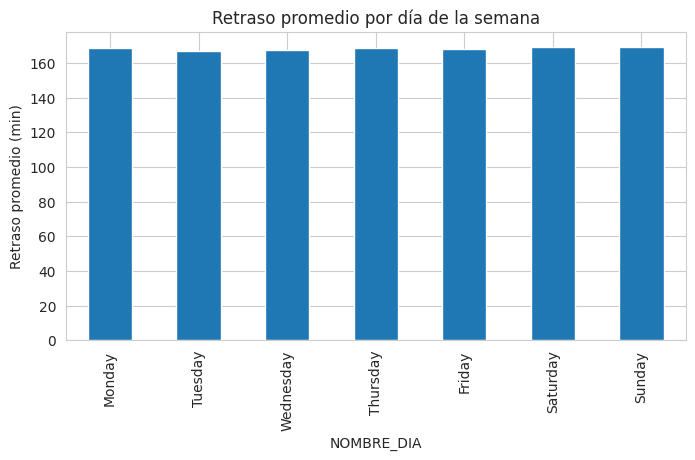

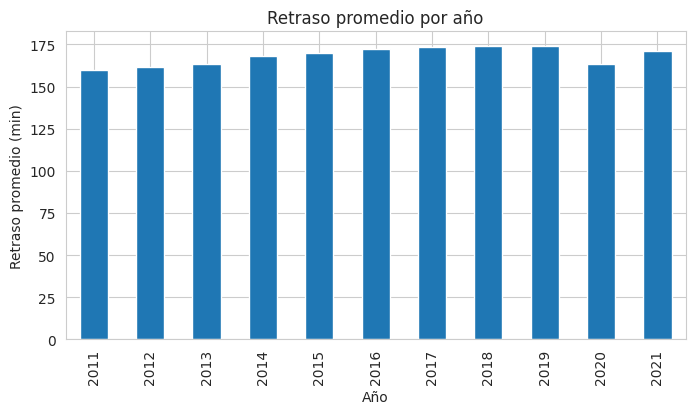

In [ ]:
# Retraso promedio por mes
plt.figure(figsize=(10,5))
df_sample.groupby("NOMBRE_MES")["RETRASO_TOTAL"].mean().reindex([
    "January","February","March","April","May","June","July","August","September","October","November","December"]
).plot(kind="bar")
plt.title("Retraso promedio por mes")
plt.ylabel("Retraso promedio (min)")
plt.show()

# Retraso promedio por día de la semana
plt.figure(figsize=(8,4))
df_sample.groupby("NOMBRE_DIA")["RETRASO_TOTAL"].mean().reindex([
    "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
).plot(kind="bar")
plt.title("Retraso promedio por día de la semana")
plt.ylabel("Retraso promedio (min)")
plt.show()

plt.figure(figsize=(8,4))
df_sample.groupby("YEAR")["RETRASO_TOTAL"].mean().plot(kind="bar")
plt.title("Retraso promedio por año")
plt.ylabel("Retraso promedio (min)")
plt.xlabel("Año")
plt.show()

**Gráfica #5.** Los valores oscilan aproximadamente entre 165 y 175 minutos, lo cual representa una variación mínima indicando que mes que destaque por registrar retrasos significativamente mayores o menores.

**Gráfica #6.** El retraso es uniforme durante toda la semana, lo cual no parece ser un patrón común, será evaluado en las próximas fases.

**Gráfica #7.** De manera similar a los patrones por día y mes, anualmente se conporta de manera uniforme oscilando entre 160 y 175 minutos.

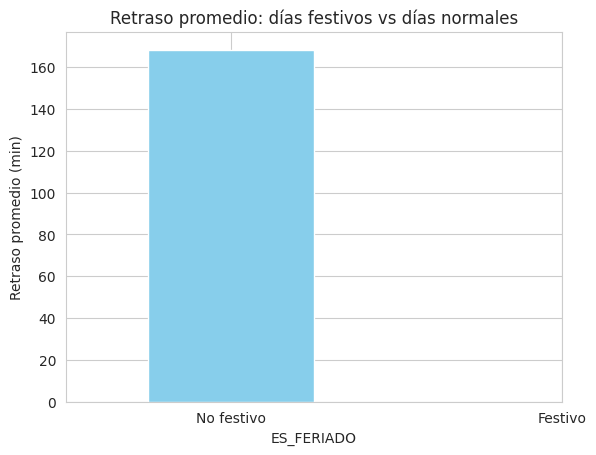

In [ ]:
df_sample.groupby("ES_FERIADO")["RETRASO_TOTAL"].mean().plot(kind="bar", color=["skyblue","orange"])
plt.title("Retraso promedio: días festivos vs días normales")
plt.ylabel("Retraso promedio (min)")
plt.xticks([0,1], ["No festivo","Festivo"], rotation=0)
plt.show()

**Gráfico #8.** Existe una tendencia a pocos o casi inexistentes datos acerca de días festivos. Puede suceder que las diferencias en formato de fechas estén afectando el resultado.

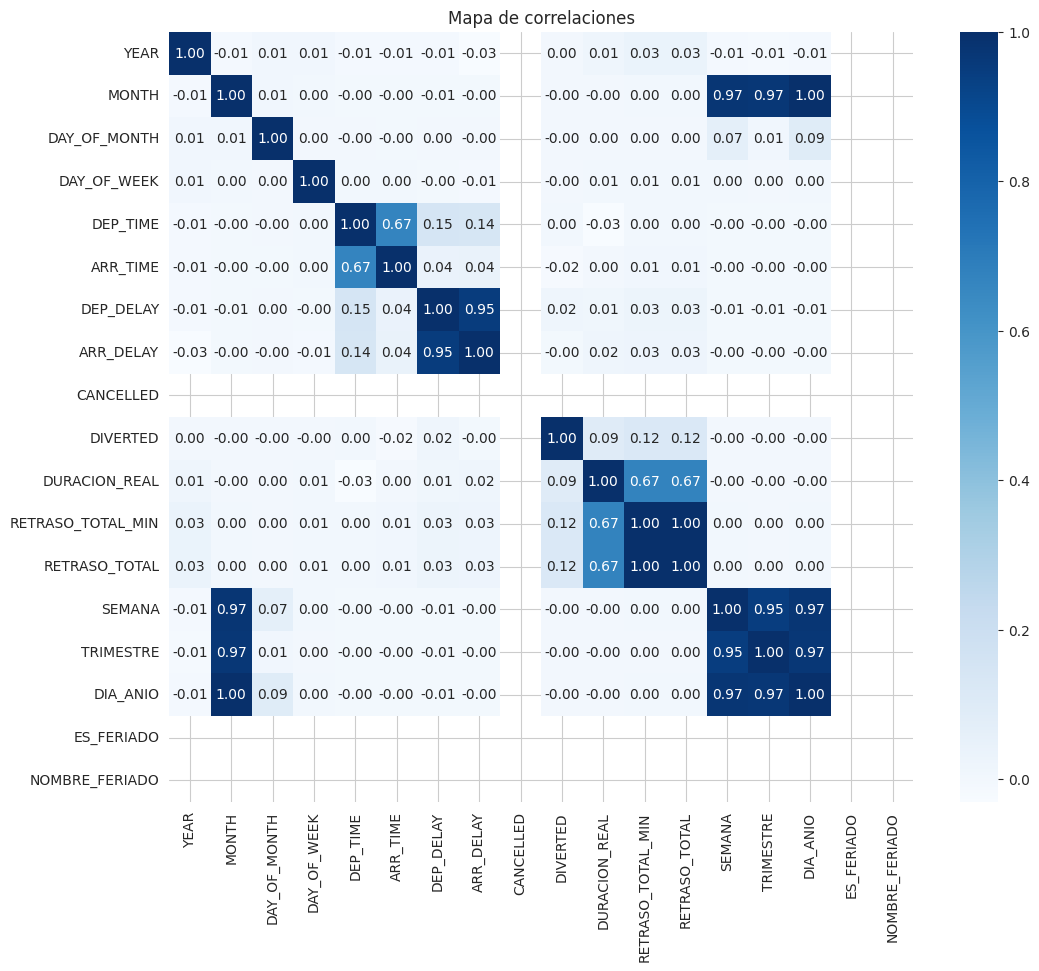

In [ ]:
# Calcular correlación solo de columnas numéricas
corr = df_sample.corr(numeric_only=True)

# Graficar heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f")
plt.title("Mapa de correlaciones")
plt.show()

**Gráfica #9.** Existe una fuerte correlación que enlaza las variables de retraso total en salida y llegada, confirmando que cuando un vuelo salga con retraso tiene un 67% de probabilidad de llegar con retraso a su destino

In [ ]:
crossTab = pd.crosstab(df_sample['OP_UNIQUE_CARRIER'], df_sample['CATEGORIA_RETRASO'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value:", ChiSqResult[1])

p-value: 0.0


p-valor < 0.05 → hay evidencia de que no son independientes (hay relación).


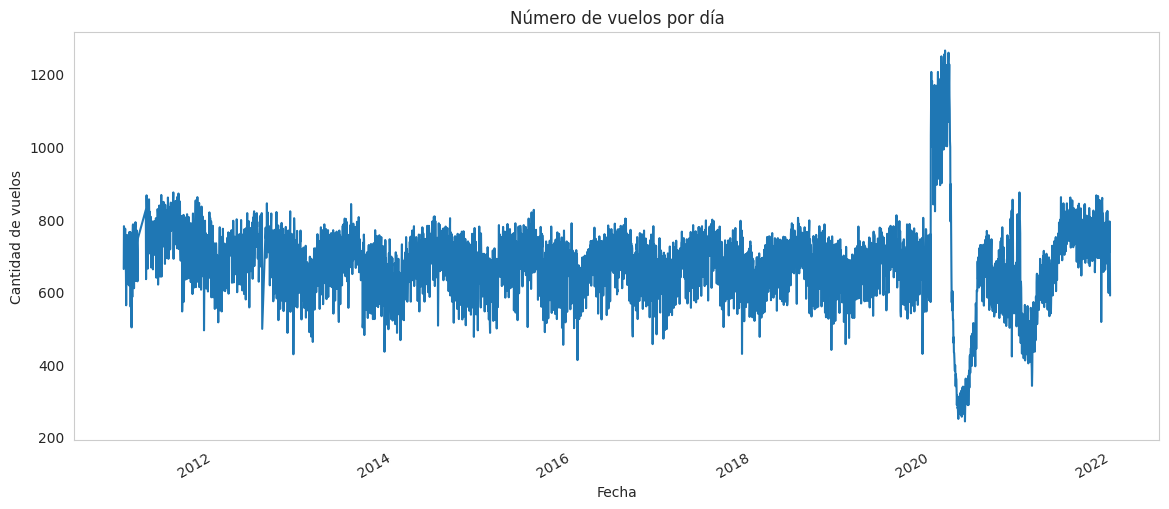

In [ ]:


vuelos_por_dia = df_sample.groupby("FECHA").size()

plt.figure(figsize=(14,6))
vuelos_por_dia.plot()
plt.title("Número de vuelos por día")
plt.ylabel("Cantidad de vuelos")
plt.xlabel("Fecha")
plt.grid()
plt.show()

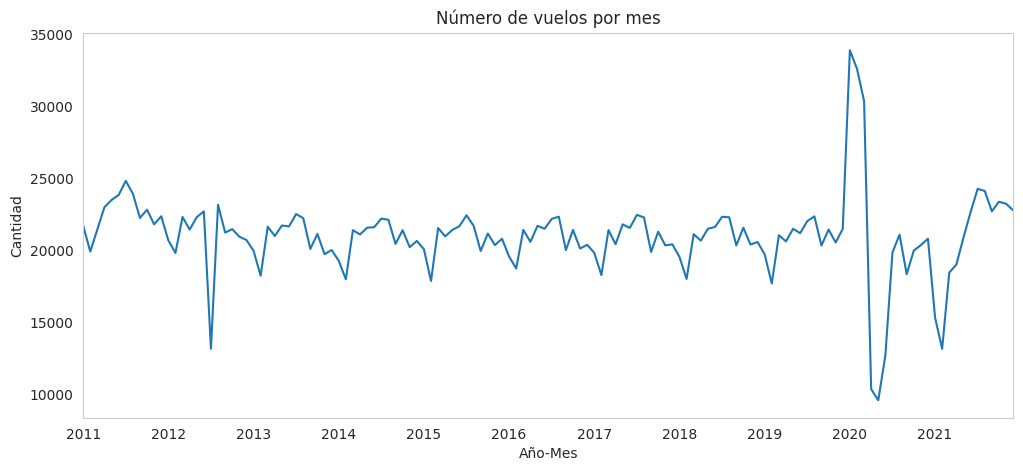

In [ ]:
df_sample['AÑO_MES'] = df_sample['FECHA'].dt.to_period('M')

vuelos_por_mes = df_sample.groupby("AÑO_MES").size()

plt.figure(figsize=(12,5))
vuelos_por_mes.plot()
plt.title("Número de vuelos por mes")
plt.ylabel("Cantidad")
plt.xlabel("Año-Mes")
plt.grid()
plt.show()


**Gráfica #10**. Se observa una fuerte alza al rededor del año 2020 y una caída a mediados de dicho año debido a la pandemia.

## 2.3 Resumen de calidad de datos

El análisis de calidad de los datos evidenció que el conjunto de información presenta una alta completitud general, con la mayoría de los campos sin valores nulos como:

* YEAR
* MONTH
* OP_UNIQUE_CARRIER
* ORIGIN
* DEST

Sin embargo, se identificó un porcentaje elevado de valores faltantes 85.3% en las campos numéricas relacionadas con las causas específicas de demora (CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY y LATE_AIRCRAFT_DELAY).

Este comportamiento es habitual en el dataset de BTS, ya que dichos campos solo se registran cuando existe un retraso atribuible a una causa concreta, en caso contrario, su valor es nulo y representa ausencia de retraso.

En las variables horarias (DEP_TIME, ARR_TIME, CRS_DEP_TIME, CRS_ARR_TIME), se detectaron valores fuera del rango válido (1–2400) en aproximadamente 0.9% de los registros, los cuales se eliminarán por inconsistencia temporal.

Finalmente, los campos booleanos (CANCELLED, DIVERTED) no presentan valores faltantes, garantizando la fiabilidad para medir cancelaciones y desvíos.

En conjunto, el dataset mantiene una consistencia superior al 98%, siendo necesario únicamente reemplazar los valores nulos en las variables de demora por cero y eliminar los registros con horas no válidas para asegurar la integridad del análisis posterior.